Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.


  0%|          | 0/200 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


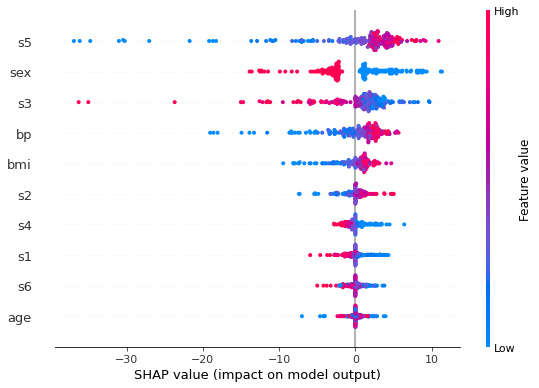

In [5]:
#!pip install shap

import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(5,),activation='logistic', max_iter=10000,learning_rate='invscaling',random_state=0)
)

model.fit(X_train,y_train)

mySamples   = shap.sample(X_train, 200)

explainer = shap.KernelExplainer(model.predict,mySamples)

shap_values = explainer.shap_values(mySamples,nsamples=100)

shap.summary_plot(shap_values,mySamples,feature_names=features)

In [4]:
print(X_test)

[[ 0.04534098 -0.04464164 -0.00620595 ...  0.03430886  0.03243232
  -0.0052198 ]
 [ 0.09256398 -0.04464164  0.03690653 ... -0.03949338 -0.02251653
  -0.02178823]
 [ 0.06350368  0.05068012 -0.00405033 ... -0.00259226  0.08449153
  -0.01764613]
 ...
 [-0.07453279 -0.04464164 -0.046085   ... -0.03949338 -0.03980883
  -0.02178823]
 [-0.02730979 -0.04464164  0.04768465 ...  0.13025177  0.04506655
   0.13146972]
 [ 0.03081083 -0.04464164  0.00564998 ...  0.1081111   0.06605067
   0.01963284]]
